# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [110]:
import pandas as pd

df_flights = pd.read_csv('/content/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [111]:
df_flights.info() #tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

##Null or missing data

In [115]:
df_flights.isnull().sum() #null data

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [113]:
#we replace null values based on DepDelay column (The number of minutes departure was delayed)
df_flights['DepDel15']=df_flights['DepDelay'].apply(lambda x: 1 if x>=15 else 0)

In [114]:
df_flights.head(20)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0,728,-9,0,0
5,2013,7,28,7,UA,12478,John F. Kennedy International,New York,NY,14771,San Francisco International,San Francisco,CA,1710,87,1,2035,183,1,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0,1210,-3,0,0
7,2013,7,28,7,EV,12264,Washington Dulles International,Washington,DC,14524,Richmond International,Richmond,VA,2218,4,0,2301,15,1,0
8,2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1010,8,0,1240,-10,0,0
9,2013,5,12,7,UA,12478,John F. Kennedy International,New York,NY,12892,Los Angeles International,Los Angeles,CA,1759,40,1,2107,10,0,0


##Outliers

Text(0.5, 1.0, 'Boxplot DepDelay y ArrDelay')

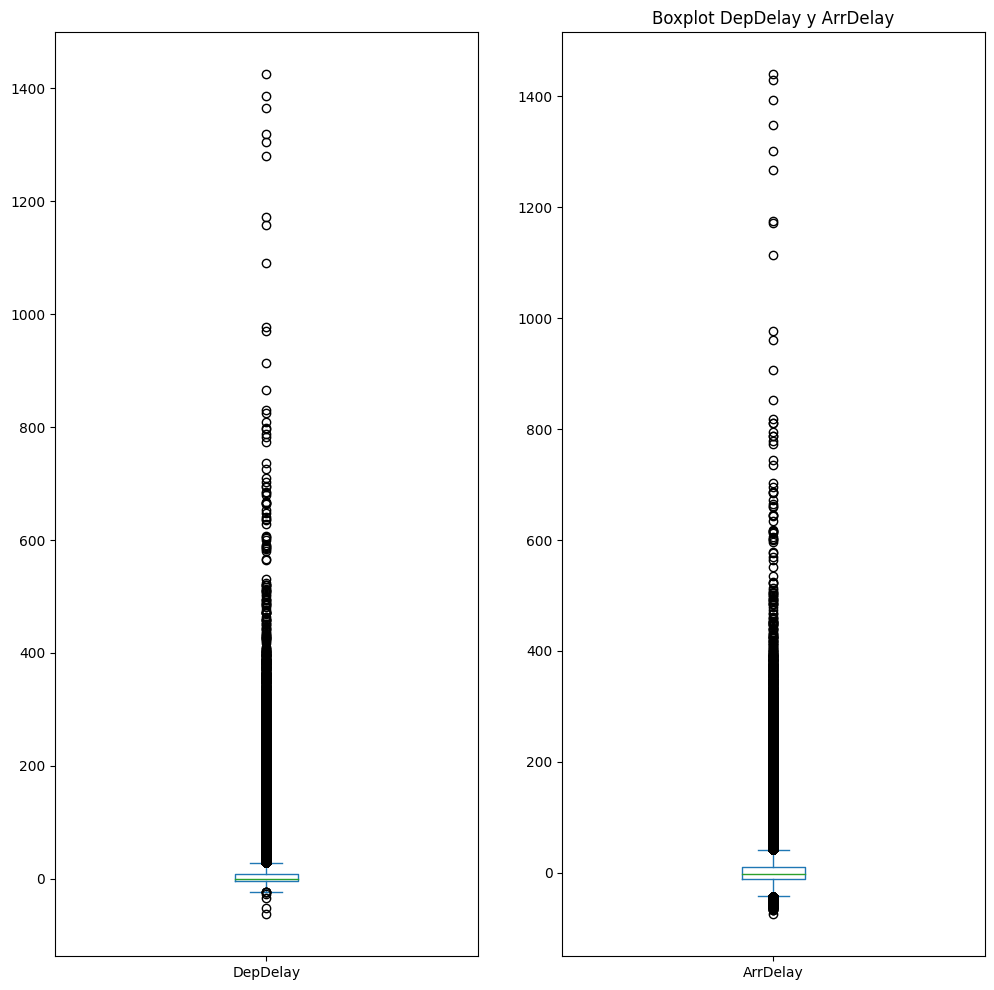

In [66]:
df_flights[['DepDelay','ArrDelay']].plot(kind = 'box', figsize = (12, 12), sharex = False, subplots = True);
plt.title("Boxplot DepDelay y ArrDelay")

In [67]:
df_flights['DepDelay'].describe()

count    271940.000000
mean         10.350449
std          35.673710
min         -63.000000
25%          -4.000000
50%          -1.000000
75%           9.000000
max        1425.000000
Name: DepDelay, dtype: float64

In [68]:
df_flights['ArrDelay'].describe()

count    271940.000000
mean          6.496650
std          38.230331
min         -75.000000
25%         -11.000000
50%          -3.000000
75%          10.000000
max        1440.000000
Name: ArrDelay, dtype: float64

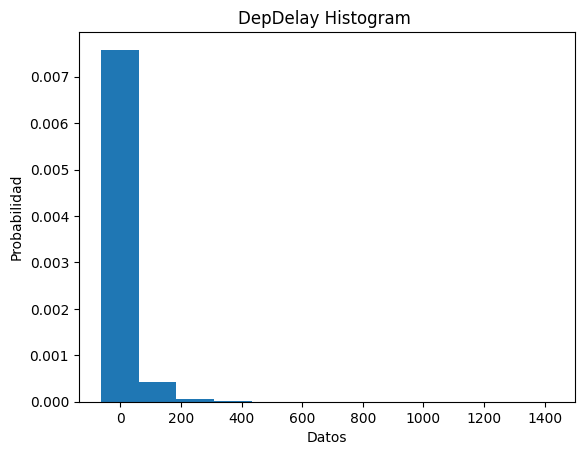

In [69]:
plt.hist(df_flights['DepDelay'], bins=12, density=True)
plt.title("DepDelay Histogram ")
plt.xlabel("Datos")
plt.ylabel("Probabilidad")
plt.show()

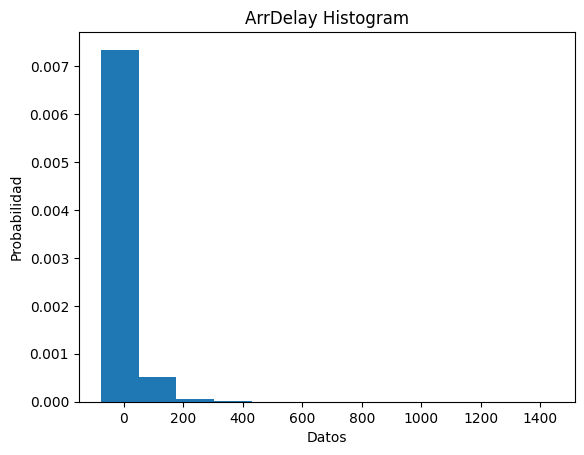

In [70]:
plt.hist(df_flights['ArrDelay'], bins=12, density=True)
plt.title("ArrDelay Histogram")
plt.xlabel("Datos")
plt.ylabel("Probabilidad")
plt.show()

In [71]:
q3, q1 = np.percentile(df_flights['DepDelay'], [75, 25]) #percentiles of departure times
print(q3, q1) #75% of the flights took up to 9 minutes to leave or left up to 4 minutes before.

9.0 -4.0


In [72]:
q3_, q1_ = np.percentile(df_flights['ArrDelay'], [75, 25]) #percentiles of arrival times
print(q3_, q1_) #75% of flights took up to 10 minutes to arrive or arrived up to 11 minutes early.

10.0 -11.0


###Outliers removal

####Departure Delay

In [73]:
df_flights_1 = df_flights[df_flights['DepDelay'] <= 60.00] #we remove flights that left up to 60 minutes late

In [74]:
df_flights_1 =df_flights_1[df_flights['DepDelay'] >= -15.00] #we remove flights that left up to 15 minutes early

<ipython-input-74-e0612cca12fb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_flights_1 =df_flights_1[df_flights['DepDelay'] >= -15.00] #we remove flights that left up to 15 minutes early


In [75]:
df_flights_1['DepDelay'].describe()

count    255225.000000
mean          3.331903
std          13.249083
min         -15.000000
25%          -4.000000
50%          -1.000000
75%           6.000000
max          60.000000
Name: DepDelay, dtype: float64

####Arrive Delay

In [76]:
df_flights_1['ArrDelay'].describe()

count    255225.000000
mean         -0.622208
std          18.199390
min         -75.000000
25%         -12.000000
50%          -4.000000
75%           7.000000
max         204.000000
Name: ArrDelay, dtype: float64

In [77]:
df_flights_1 = df_flights_1[df_flights_1['ArrDelay'] >= -15.00] #we remove flights that arrived up to 15 minutes early

In [78]:
df_flights_1 =df_flights_1[df_flights_1['ArrDelay'] <= 60.00] #we remote flights that arrived up to 60 minutes late

##Explore the cleaned data

In [79]:
df = df_flights_1 #we rename dataset

###View summary statistics for the numeric fields in the dataset.

In [80]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,212064.0,212064.000000,212064.000000,212064.000000,212064.000000,212064.000000,212064.000000,212064.000000,212064.000000,212064.000000,212064.000000,212064.000000,212064.000000
mean,2013.0,6.989239,15.854511,3.892693,12765.025860,12741.980364,1316.826628,4.444899,0.168921,1495.943126,2.634299,0.188891,0.013529
std,0.0,1.980378,8.795381,1.982014,1510.877096,1516.104508,467.676042,13.375091,0.374683,488.513573,14.805342,0.391423,0.115525
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-15.000000,0.000000,1.000000,-15.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,915.000000,-4.000000,0.000000,1115.000000,-8.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1310.000000,0.000000,0.000000,1519.000000,-1.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14100.000000,1715.000000,8.000000,0.000000,1910.000000,9.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,60.000000,1.000000,2359.000000,60.000000,1.000000,1.000000


###Determine the distribution of the DepDelay and ArrDelay columns.

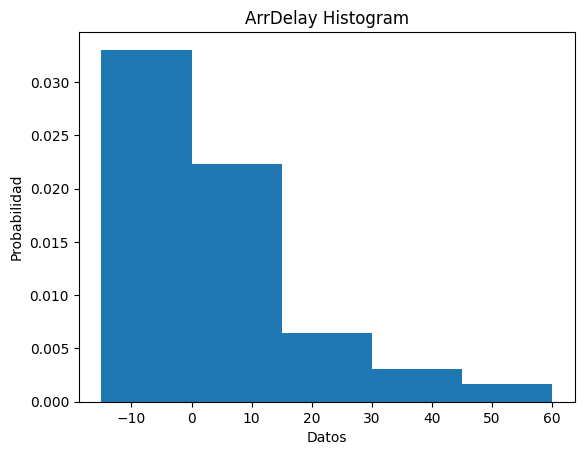

In [81]:
plt.hist(df['DepDelay'], bins=5, density=True)
plt.title("ArrDelay Histogram")
plt.xlabel("Datos")
plt.ylabel("Probabilidad")
plt.show()

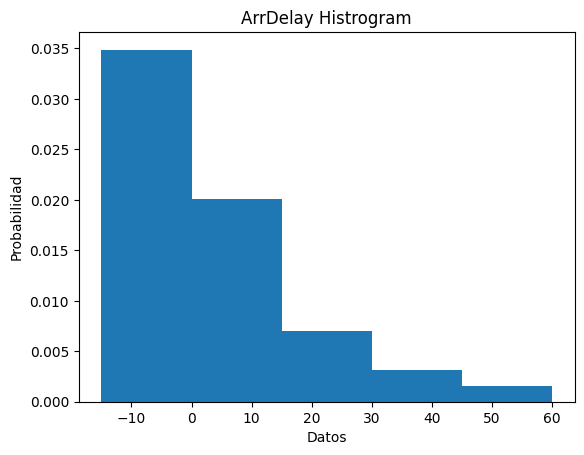

In [82]:
plt.hist(df['ArrDelay'], bins=5, density=True)
plt.title("ArrDelay Histrogram")
plt.xlabel("Datos")
plt.ylabel("Probabilidad")
plt.show()

###What are the average (mean) departure and arrival delays?

In [83]:
df['ArrDelay'].mean() #the average arrival delay is 2,6 minutes

2.6342990795231627

In [84]:
df['DepDelay'].mean() #the average departure delay is 4,4 minutes

4.444898709823449

###How do the carriers compare in terms of arrival delay performance?


In [85]:
df['Carrier'].nunique() #to know amount of carriers

16

In [86]:
df['Carrier'].unique()

array(['DL', 'WN', 'AS', 'OO', 'EV', 'AA', 'UA', 'MQ', 'US', 'YV', 'FL',
       'F9', 'B6', 'VX', '9E', 'HA'], dtype=object)

In [87]:
avg_time = df.groupby('Carrier')['ArrDelay'].mean()
avg_time

Carrier
9E    0.863866
AA    2.956532
AS    1.262936
B6    3.446372
DL    0.274309
EV    2.754676
F9    4.851768
FL    3.198368
HA   -0.115159
MQ    4.759941
OO    1.667651
UA    2.494754
US    2.191608
VX    1.712644
WN    4.134763
YV    1.592358
Name: ArrDelay, dtype: float64

<Axes: title={'center': 'Average times of delays in arrivals by carriers'}, xlabel='Carrier'>

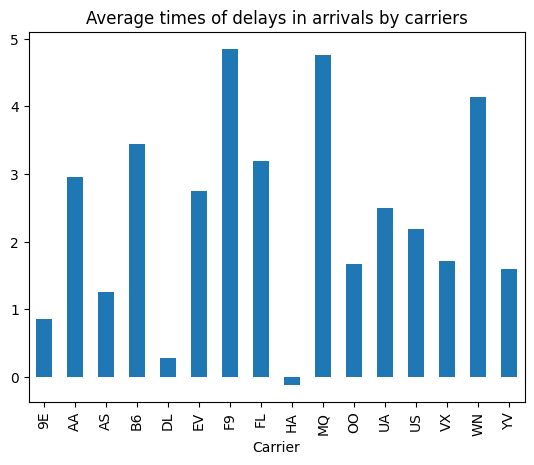

In [88]:
avg_time.plot(kind='bar', title='Average times of delays in arrivals by carriers') #Carriers B6, F9, MQ and VX are the ones with the most delays

###Is there a noticable difference in arrival delays for different days of the week?

In [89]:
avg_time_byday = df.groupby('DayOfWeek')['ArrDelay'].mean() #Thursdays and Fridays are the days with the longest arrival delays
avg_time_byday

DayOfWeek
1    2.698128
2    1.735101
3    2.686009
4    4.028310
5    3.470809
6    1.149103
7    2.266630
Name: ArrDelay, dtype: float64

<Axes: title={'center': 'Average times of delays in arrivals by days'}, xlabel='DayOfWeek'>

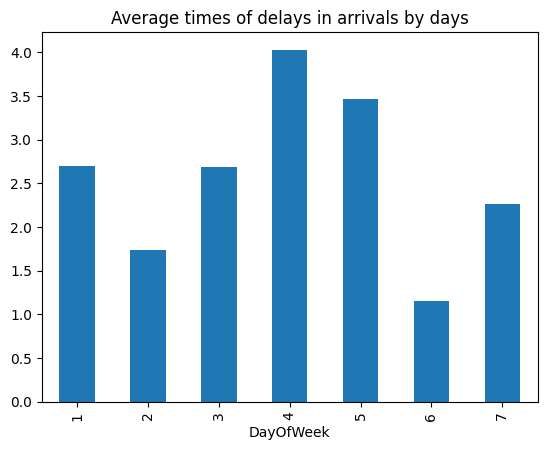

In [90]:
avg_time_byday.plot(kind='bar', title='Average times of delays in arrivals by days')

###Which departure airport has the highest average departure delay?

In [91]:
avg_time_airport = df.groupby('OriginAirportName')['DepDelay'].mean()

In [92]:
avg_time_airport.idxmax()

'Chicago Midway International'

In [93]:
# we filter the DataFrame to include only the rows corresponding to the airport with the longest delay
df_filtrado = df[df['OriginAirportName'] == 'Chicago Midway International']

# we calculate the average delay time in departures for the airport with the longest delay
highest_avg_time_airport = df_filtrado['DepDelay'].mean()

In [94]:
print(f"The airport {avg_time_airport.idxmax()} has the highest average dealy on departures : {highest_avg_time_airport} minutes")

The airport Chicago Midway International has the highest average dealy on departures : 10.052794292508917 minutes


###Do late departures tend to result in longer arrival delays than on-time departures?

In [95]:
late_departure_late_arrival = ((df['DepDel15'] == 1) & (df['ArrDel15'] == 1)).sum()
print(f"Late departures that determined a late arrival are: {late_departure_late_arrival}")

Late departures that determined a late arrival are: 25110


In [96]:
ontime_departures_late_arrival = ((df['DepDel15'] == 0) & (df['ArrDel15'] == 1)).sum()
print(f"On time departures that determined a late arrival are: {ontime_departures_late_arrival}")

On time departures that determined a late arrival are: 14947


###Which route (from origin airport to destination airport) has the most late arrivals?

In [97]:
df['route'] = df['OriginAirportName']+ '-' + df['DestAirportName']

In [98]:
most_late_arrival_route = df.groupby('route')['ArrDel15'].sum()
most_late_arrival_route

route
Albuquerque International Sunport-Baltimore/Washington International Thurgood Marshall     1
Albuquerque International Sunport-Chicago Midway International                            13
Albuquerque International Sunport-Chicago O'Hare International                             7
Albuquerque International Sunport-Dallas Love Field                                       18
Albuquerque International Sunport-Dallas/Fort Worth International                         21
                                                                                          ..
William P Hobby-San Antonio International                                                 14
William P Hobby-San Diego International                                                   17
William P Hobby-Seattle/Tacoma International                                               2
William P Hobby-Tampa International                                                       18
William P Hobby-Will Rogers World                               

In [99]:
most_late_arrival_route.idxmax()

'San Francisco International-Los Angeles International'

In [100]:
df_filtrado_2 = df[df['route'] == 'San Francisco International-Los Angeles International']

In [101]:
most_late_arrival_route_time = df_filtrado_2['DepDelay'].max()

In [102]:
print(f"The route {most_late_arrival_route.idxmax()} has the most late arrival time: {most_late_arrival_route_time} late arrivals")

The route San Francisco International-Los Angeles International has the most late arrival time: 59 late arrivals


###Which route has the highest average arrival delay?

In [103]:
avg_time_arrival_delay_route = df.groupby('route')['ArrDel15'].mean()

In [104]:
avg_time_arrival_delay_route

route
Albuquerque International Sunport-Baltimore/Washington International Thurgood Marshall    0.032258
Albuquerque International Sunport-Chicago Midway International                            0.317073
Albuquerque International Sunport-Chicago O'Hare International                            0.189189
Albuquerque International Sunport-Dallas Love Field                                       0.132353
Albuquerque International Sunport-Dallas/Fort Worth International                         0.139073
                                                                                            ...   
William P Hobby-San Antonio International                                                 0.166667
William P Hobby-San Diego International                                                   0.309091
William P Hobby-Seattle/Tacoma International                                              0.333333
William P Hobby-Tampa International                                                       0.260870
Will

In [105]:
avg_time_arrival_delay_route.idxmax()

'Cleveland-Hopkins International-Palm Beach International'

In [106]:
df_filtrado_3 = df[df['route'] == 'Cleveland-Hopkins International-Palm Beach International']

In [107]:
highest_avg_time_arrival_delay_route = df_filtrado_3['ArrDel15'].max()

In [108]:
print(f"The route {avg_time_arrival_delay_route.idxmax()} has the higheste late arrival average: {highest_avg_time_arrival_delay_route} min.")

The route Cleveland-Hopkins International-Palm Beach International has the higheste late arrival average: 1 min.
